## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 

- Pandas is one of the most famous Python libraries when it comes to data science, machine learning, deep learning, and even AI, also with Pandas, we can do many operations on data, which involve analysing it, preparing it, manipulating it, and visualising it.

- Numpy stands for "numerical Python" and is one of the fastest libraries when it comes down to crunching numbers and performing a calculation on them.

- Plotly,Seaborn and matplotlib are libraries used for data Visualization.

In [2]:
raw_data = pd.read_csv("E:\MSc.DATA SCIENCE\Dataset\cancerdata.csv")
raw_data.tail()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268,0
679,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268,0
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695,1
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268,1
682,3.639465,7.638702,7.682342,5.742196,4.792233,4.918612,10.154346,4.851618,3.199268,1


- We are reading CSV (comma-separated value) files and storing them in raw_data using Panda's built-in function.

- .tail() is a built-in pandas function that returns the bottom five values of the given data set.

In [3]:
for columns in raw_data.columns:
    print(columns)

Cl.thickness
Cell.size
Cell.shape
Marg.adhesion
Epith.c.size
Bare.nuclei
Bl.cromatin
Normal.nucleoli
Mitoses
Class


- There are multiple ways to get the column names of a data frame, like data_frame.keys(), data_frame.columns, etc.
- I prefer it this way.
- Description of columns are given in coursework assignment handout


In [4]:
raw_data.shape

(683, 10)

- The given dataset is of 683 X 10, i.e 638 rows and 10 columns 

In [5]:
raw_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    float64
 1   Cell.size        683 non-null    float64
 2   Cell.shape       683 non-null    float64
 3   Marg.adhesion    683 non-null    float64
 4   Epith.c.size     683 non-null    float64
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    float64
 7   Normal.nucleoli  683 non-null    float64
 8   Mitoses          683 non-null    float64
 9   Class            683 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 53.5 KB


- Except for the class, all columns are of the float data type. 
- ```data_frame.info()``` provides the information on data frame from the index data type and  to columns null count, and memory usage.

In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cl.thickness,683.0,4.000000,2.300000,1.193317,2.008699,3.639465,5.270230,8.531761
Cell.size,683.0,4.000000,2.300000,2.386095,2.386095,2.386095,5.387585,9.139446
Cell.shape,683.0,4.000000,2.300000,2.295170,2.295170,2.295170,5.373554,9.221535
Marg.adhesion,683.0,4.000000,2.300000,2.530536,2.530536,2.530536,4.939281,9.756771
Epith.c.size,683.0,4.000000,2.300000,1.688438,2.723036,2.723036,4.792233,10.999821
Bare.nuclei,683.0,4.000000,2.300000,2.393815,2.393815,2.393815,5.549811,8.074609
Bl.cromatin,683.0,4.000000,2.300000,1.704320,2.643212,3.582104,5.459887,10.154346
Normal.nucleoli,683.0,4.000000,2.300000,2.591299,2.591299,2.591299,4.851618,9.372257
Mitoses,683.0,4.000000,2.300000,3.199268,3.199268,3.199268,3.199268,15.146119
Class,683.0,0.349927,0.477296,0.000000,0.000000,0.000000,1.000000,1.000000


- ```Data_frame.describe()``` gives us statistical information about the given data frame. This includes minimum, maximum, mean, and quartile values.

In [7]:
raw_data.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

- Data_frame.isnull() checks if there are null values or not and gives a result in true or false format.
- Data_frame.sum() gives the addition of these values.
- In this case, data_frame.isnull().sum() gives the count of null values in each column.
- Our dataset contains no null values.

In [8]:
raw_data.duplicated().sum()

234

- ```Data_frame. duplicated().sum()``` gives us the count of duplicate values in the dataset.
- There are 234 duplicate values, as we can see. 

In [9]:
duplicateRowsDF = raw_data[raw_data.duplicated()]
duplicateRowsDF

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
27,2.008699,2.386095,2.29517,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0
34,2.008699,2.386095,2.29517,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0
46,3.639465,2.386095,2.29517,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0
62,1.193317,2.386095,2.29517,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0
64,3.639465,2.386095,2.29517,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
...,...,...,...,...,...,...,...,...,...,...
670,1.193317,2.386095,2.29517,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268,0
672,3.639465,2.386095,2.29517,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268,0
674,1.193317,2.386095,2.29517,4.136366,2.723036,2.393815,1.704320,2.591299,3.199268,0
676,2.824082,2.386095,2.29517,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268,0


  ```Data_frame[Data_frame.duplicated()]``` Here we are selecting duplicate values from our data set and storing them in variables.

In [10]:
raw_data.drop_duplicates(keep ='first',inplace=True )
raw_data.shape

(449, 10)

- ```Data_frame.drop_duplicates(keeps = "first", inplace = True)``` will drop duplicate values while keeping the first occurrence of duplicate data, whereas inplace will write over existing data. 

In [11]:
raw_data.groupby("Class").count()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Class,,,,,,,,,
0,213,213,213,213,213,213,213,213,213
1,236,236,236,236,236,236,236,236,236


- Data_Frame.groupby("condition") group the data set on the basis of a passed condition or column.
- We can see that the dataset is more balanced after we remove the duplicate values.


## EDA

#### EDA stands for Exploratory Data Analysis.
#### EDA is the process of critically analysing data to discover insights, seasonal or repeatable patterns, and outliers. Moreover, it also gives an in-depth view of data without any mathematical operation.

#### 1.Heatmap

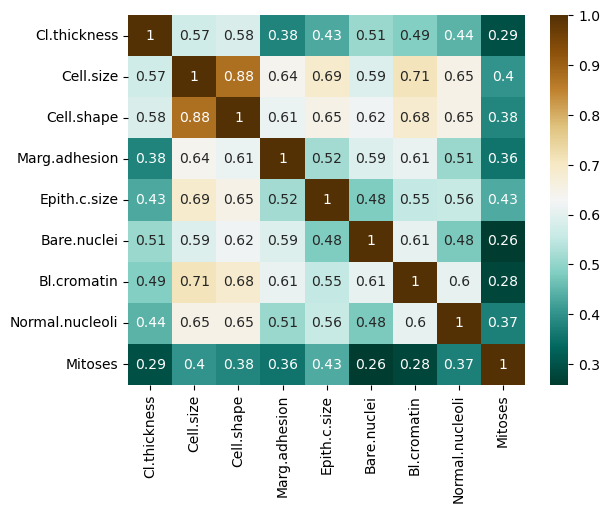

In [12]:
sns.heatmap(raw_data.iloc[:,:-1].corr(method = "pearson"),cmap="BrBG_r",annot=True)
plt.show()

- By Data_Frame.iloc[:,:-1] We are selecting all the columns except that last one, as it is our target class.
- For the heatmap, we have considered all the columns except the target feature (Class).
- Here we can see that cell.shape and cell size are highly correlated, so we can drop one of these two columns.
- Cell.size is also highly correlated with epith.c.size and BI.chromatin. As a result, we will drop it, with the threshold set at 70. 

In [13]:
raw_data.drop(columns="Cell.size",inplace=True)

- We are removing the column Cell.size from this Data set. 

#### 2.BoxPlot

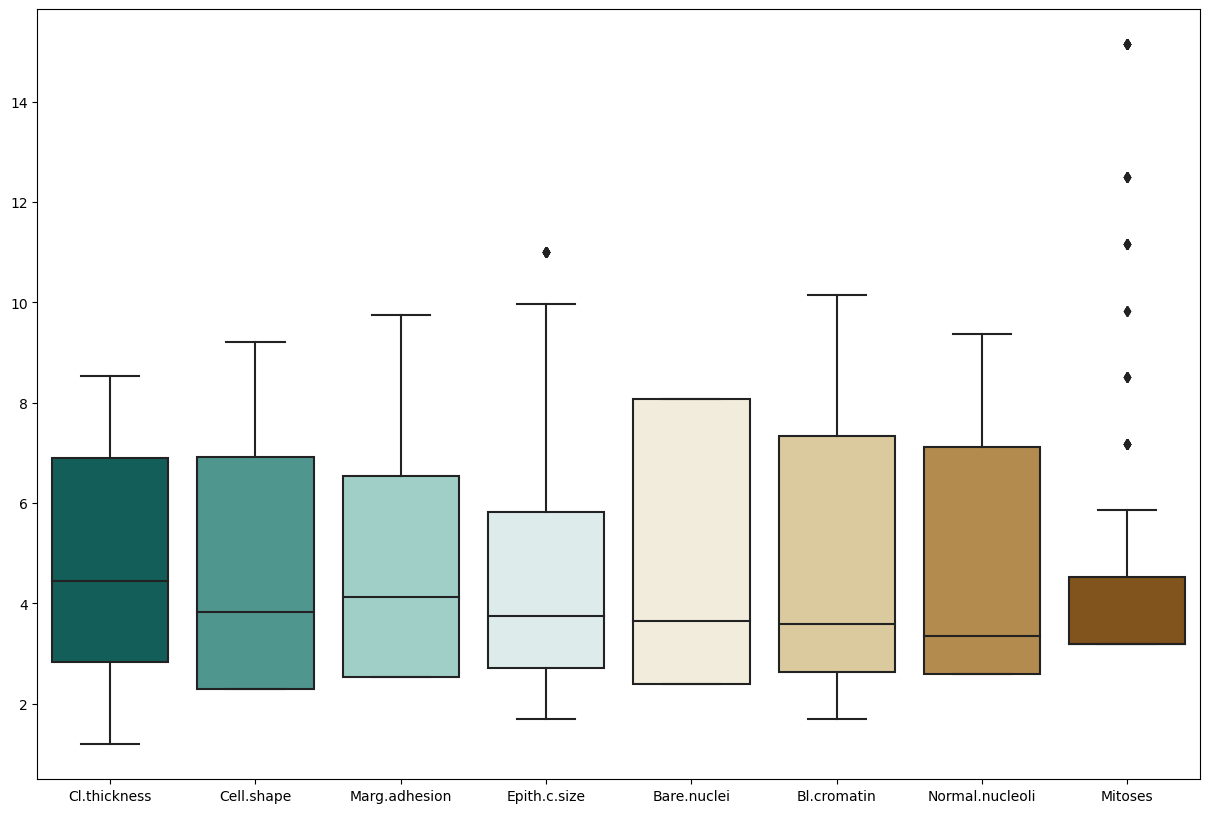

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data = raw_data.iloc[:,:-1],palette="BrBG_r")
plt.show()

- Box plots are created from a five-number summary and provide information about the mean, median, and interquartile range.

- Box plots show us how the data is distributed and if there are any outliers.
- We can see that there are some outliers in epith.c.size and mitoses, we can either remove them or normalise them, but first let's look at the dataset's distribution. 

<AxesSubplot:xlabel='Mitoses', ylabel='Count'>

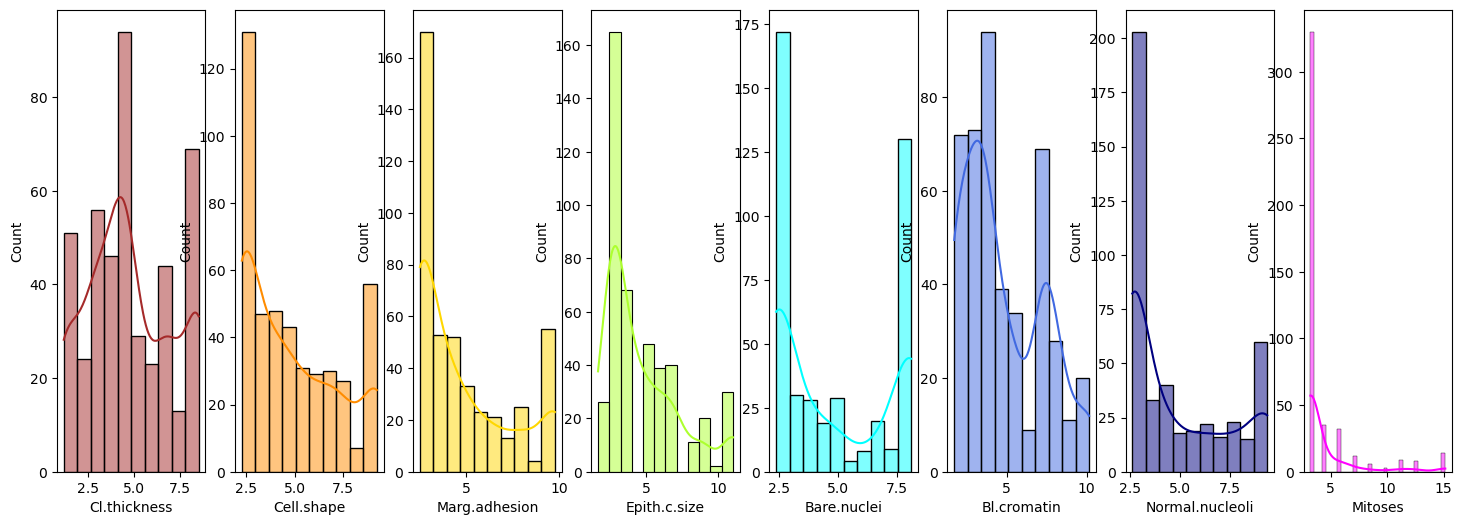

In [15]:
fig, axes = plt.subplots(1, 8, figsize=(18, 6))
sns.histplot(raw_data, ax=axes[0], x="Cl.thickness", kde=True,color='brown')
sns.histplot(raw_data, ax=axes[1], x="Cell.shape", kde=True, color='darkorange')
sns.histplot(raw_data, ax=axes[2], x="Marg.adhesion", kde=True,color = "gold")
sns.histplot(raw_data, ax=axes[3], x="Epith.c.size", kde=True,color = "greenyellow")
sns.histplot(raw_data, ax=axes[4], x="Bare.nuclei", kde=True,color = "cyan")
sns.histplot(raw_data, ax=axes[5], x="Bl.cromatin", kde=True,color = "royalblue")
sns.histplot(raw_data, ax=axes[6], x="Normal.nucleoli", kde=True,color = "navy")
sns.histplot(raw_data, ax=axes[7], x="Mitoses", kde=True,color = "magenta")


- We can say that our dataset is skewed and that we must standardise it in order for the result to make sense and to increase the performance of machine learning algorithms.

## Scalling of Dataset 
- Scaling is important as every feature may have a different magnitude, and if we use it without scaling, it will affect the accuracy of machine learning algorithms as it take the magnitude of observation into account. and if two parameters are scaled on different units or scales, it won't be able to evaluate them properly.

#### 1.Standard Normalisation
$$ Z = {(X_{i}−μ)\over \sigma} $$

        Xi is current observation
         μ is Mean 
         σ is Standard Deviation.
         
- With the help of this standardization, also known as z-score normalization, all the features will be rescaled to a standard normal distribution within the parameters of μ = 0 and σ = 1.

#### 2.Min - Max Scaler
$$ Xnr={(X−Xmin) \over (Xmax−Xmin)}$$
     
         X(nr) is a standardised value.
        X(min) is the smallest value of x.
        X(max) is the greatest possible value of x.
        x represents the most recent observation. 
          
          
- It helps in scaling the data points between zero and one.

- Here I will split the data set into two, i.e., the test data set and the training data set, and then apply the scaling to them individually.

In [16]:
X = raw_data.iloc[:,:-1]
y = raw_data[["Class"]]

- I have split the dataset into x and y, with x being the independent variable and y being our target variable. After splitting, we will scale the dataset and prepare it for a machine learning model.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
Zsn = StandardScaler()
Mim = MinMaxScaler()

- I used two different scaling techniques in this case:
    Standardisation and Normalization.
- Although they may sound similar, they are not.
- Standardization will rescale the value of a particular feature to fit the standard normal distribution.
- Normalization will convert the feature into a range between zero and one.
- For Naive Bayes, we'll use StandardScaler, and for logistic regression, we'll use min-max scaler. 

In [18]:
X1 = Zsn.fit_transform(X)
X2 = Mim.fit_transform(X)
X1 = pd.DataFrame(X1,columns=raw_data.iloc[:,:-1].columns)
X2 = pd.DataFrame(X2,columns=raw_data.iloc[:,:-1].columns)

- After calling the desired scaling technique, we will fit our independent features into it, and this is done by the function ".fit_transform()"
- Here we have two scaling techniques, so we will be assigning them to different variables, X1 and X2.

## Theory and implementation of Models.

### 1.Naive Bayes

 - Naive Bayes theorems are based on conditional probability. and its formula is given as,
 
$$ P(x|y) = {P(y|x) * P(x)  \over P(y)} $$
         
             P(x|y) denotes that probability of x given y has occured
             P(x) denotes that probability of event x
             P(y) denotes that probability of y
             
- It is now known as "Naive Bayes" because it is based on the Bayes theorem and the naive assumption that every event is independent of each other. That is why we look for co-relationships and discard highly co-relational features. 

- Now, there are three types of Naive Bayes alogorithms,
     1. Gaussian Naive Bayes
         - NOW Gaussian is used when the data or feature fallows normal or Gaussian distribution.
     2. Multinomial Naive Bayes
         - Multinomial is used when the features are discreet. 
     3. Bernoulli Naive Bayes
         - Bernoulli is when the data we have are in range of zeros and one.
         
         
*Based on the previous analysis, we can easily conclude that the data we have does not obey Multinomial and Bernoulli but rather satisfies Gaussian Naive Bayes algorithms. But we also figured out that our data set is skewed, and thus we need to scale it properly.*
     
#### 1.1 Gaussian Naive Bayes


- In our case, X represents the class variable (0 or 1) that is cancerous or non-cancerous under the given conditions Y. 


- Y here represents parameters such as Cl.thickness, Cell.size, Cell.shape, Marg.adhesion, and etc, which can be denoted by Y1, Y2, Y3,... Yn respectively.


- Now if we use chain rule and substitute this value in Bays rule we get,

$$P(x|y_{1},y_{2}...y_{n}) = {P(y_{1}|x)P(y_{2}|x)...P(y_{n}|x)P(x)\over P(x_{1})P(x_{2})...P(y_{n})}$$


- Now, we want to select the one that will give us the highest posterior probability, so we take argmax of y.

$$X = argmax_{x} P(y_{1}|x).P(y_{2}|x).....P(y_{n}|x).P(x) $$

- We know that probability values range from 0 to 1, and multiplying them would result in a very small result, causing an accuracy issue, so we use log and our formula changes to,

$$X = argmax_{x} log(P(y_{1}|x))+log(P(y_{2}|x)).....log(P(y_{n}|x))+log(P(x)) $$

- now we need to calculate: $$P(x)$$ $$P(y_{1}|x)$$ and so on 

- now $$P(x)$$ is basically called the "prior class," and we can calculate it by calculating the frequency of each class.

- $$P(y_{1}|x)$$ is termed "class conditional probability" and could be calculated by a Gaussian model.

$$P(y_{1}|x)=  {1\over \sqrt{2 \Pi\sigma^{2}x}}.{exp(-(y_{i}-\mu_{x})^{2})\over 2\sigma^{2}x } $$

### In simpler terms, if I have to say this, I can say that.
   #### 1.Training includes calculating the mean, variance, and frequency of independent variable.
   #### 2. We calculate the posterior probability for each independent variable with $$X = argmax_{x} log(P(y_{1}|x))+log(P(y_{2}|x)).....log(P(y_{n}|x))+log(P(x)) $$ and our gaussian formula $$P(y_{1}|x)=  {1\over \sqrt{2 \Pi\sigma^{2}x}}.{exp(-(y_{i}-\mu_{x})^{2})\over 2\sigma^{2}x } $$ and choose the one with the highest probability of our target variable (posterior probability).
   
   #### Let's see the implementation.

In [19]:
from sklearn.model_selection import train_test_split

# We've already scaled our data and divided it into test and training sets for the model. 
# For naive Bayes, we are going to use z-score normalization. 

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=41)

# Here i have divided into train and test 
# 80 per cent of the data goes to training; the rest,  20 per cent, i.e., test data, will be used to evaluate our model.
# As we have used z-score normalization, we can safely assume that our data follows a gaussian distribution, 
# and thus we can easily use the gaussian naive Bayes model.

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# i have used scikit-learn to import a pre-defined Gaussian naive Bayes model. 

GNB.fit(X_train, y_train.values.ravel())

# now after calling we are training the model by calling model.fit() method
# we are training the model on X_train and Y_train

y_predict=GNB.predict(X_test)
# We are not using this for the time being, but it will come in handy during scoring and validation metrics.

print('Train Score:',GNB.score(X_train,y_train))
print('Test Score:',GNB.score(X_test,y_test))

Train Score: 0.9415041782729805
Test Score: 0.9555555555555556


## 2.Logistic Regression

- Logistic Regression is a classification machine learning algorithm.
- Classification techniques can be divided into two categories:
  1. Binary Classification
  2. Multi-class Classification 
  3. Ordinal Logistic Regression
  
- we are going to use Binary Classification, as our target can be divided into two categories.
  
- Now to understand Logistic Regression we need to understand how it is diffferent from linear regression
    - linear regression work on the equation $y ={mx+c}$
        - here c is intercep.
        - x is our data point.
        - m is slope of line. 
        - y is our linear line (best fit line).
    - To find the best fit line, we try to find the shortest distance between the line and our data point.
    
        - $y = {mx+c}$ can aslo be written as $y = {\beta_{0}+\beta_{1}x+\delta}$
        - $\delta$ is error
        - $x$ is all observation of independent variables
        - $\beta_{1}$ is slope of line 
        - $\beta_{0}$ is our y intercep 
        
 - case where we have multiple data points, the equation changes to.
 $y = {\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+.....+ \beta_{n}x_{n}+\delta}$
    
    
    
    
- Now there's an issue with the linear regression model: what if our dataset has a genuine outlier? In that case, our best fit line changes and many data points will be wrongly classified.
- In some cases of classification, our best fit line will not squash our data point, thus giving an output less than zero or greater than one.  

##### *Thus Logistic regression*
- In logistic regression, we get the probability of occurance instead of a particular value of variable, and this is achieved by substituting out values in the sigmoid function, and our strain line now takes the shape of the English alphabet "S."

$$ y = {1\over1+e^{-{(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+.....+ \beta_{n}x_{n}+\delta)}}}$$

- After substituting our values in this equation, we will get our output in the range of 0 and 1, which is what we wanted.
     ### Decision Boundry.
     - Just like in linear regression, we must define a decision boundary even in this case, but unlike in linear regression, we are dealing with probability rather than the values stated earlier.
     
     - Here sigmoid function yields a probability value, which ranges from 0 to 1
     - Now, we choose a threshold value to convert this probability value to a discrete category, i.e., true or false. The "decision border" is the name given to this minimum threshold. If the probability value is greater than this threshold, we will map that into category 1, and if it is lower, we will map it into category 0.
     


- Classification techniques can be divided into two categories:
  1. Binary Classification
  2. Multi-class Classification 
  3. Ordinal Logistic Regression
  
- we are going to use Binary Classification, as our target can be divided into two categories.
  

In [20]:
from sklearn.model_selection import train_test_split

# We've already scaled our data and divided it into test and training sets for the model. 
# For Logistic Regression, we are going to use, Min - Max Scaler. 

X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y, test_size=0.20, random_state=3)
from sklearn.linear_model import LogisticRegression

# Here i have divided into train and test 
# 80 per cent of the data goes to training; the rest,  20 per cent, i.e., test data, will be used to evaluate our model.
# Because we used the Min-Max Scaler, we can safely assume that our data's features fall between zero and one. 
# and thus we can easily use the LogisticRegression model.

LOR = LogisticRegression()

# I have used scikit-learn to import a pre-defined Gaussian naive Bayes model. 

LOR.fit(X1_train, y1_train.values.ravel())
y1_predict=LOR.predict(X1_test)

# now after calling we are training the model by calling model.fit() method
# we are training the model on X_train and Y_train


print('Train Score:',LOR.score(X1_train,y1_train))
print('Test Score, Also called as Holdout Validation Approach :',LOR.score(X1_test,y1_test))


Train Score: 0.9610027855153204
Test Score, Also called as Holdout Validation Approach : 0.9222222222222223


# Scoring and Validation

 - Now that we have trained two models on our singular data set, it's time to decide which model works the best. Yes, we can take the accuracy of the given model into account, but when a machine learning model identifies something wrongly, it will still say it with high accuracy, which can be problematic in many cases.
 
 - There are several methods for comparing various model parameters; these are, 
     1. confussion matrix
     2. AUC-ROC Curve
     3. cross validation
     
- Lets understand and implement these,

##### 1. Confusion matrix
- The confusion matrix highlights, as the name implies, where the model is weak or confused; these are further divided into different categories as follows:
    1. True Positive
       - Occurrences that are appropriately labeled as positive and were positive. 
    2. False Positive
       - Occurrences that are inappropriately labeled as positive and were negative.
    3. True Negative
       - Occurrences that are appropriately labeled as negative and were negative.
    4. False Negative
       - Occurrences that are inappropriately labeled as positive and were negative.

Naive Bayes
True Positive = 50, False Positive = 1, True Negative = 36, False Negative = 3
sensitivity of our mode: 94.33962264150944 %
specificity of our mode: 97.2972972972973 %
---------------------------------------------------------------------------------------------------------
Logistic regression
True Positive = 44, False Positive = 4, True Negative = 39, False Negative = 3
sensitivity of our mode: 93.61702127659575 %
specificity of our mode: 90.69767441860465 %


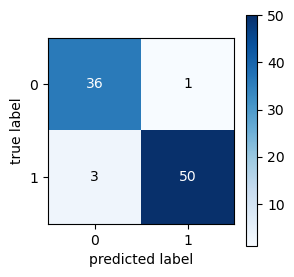

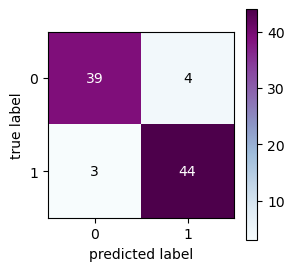

In [21]:
from sklearn import metrics
## We are importing metrics from Sklearn so that we can calculate true positives, false positives, etc.
## easily as these libraries have support for them.
    
print ("Naive Bayes")
## printing model so that it is easy to understand.
confusion_Naive_Bayes = metrics.confusion_matrix(y_test, y_predict)
# calling confusion matrix function anf storing it in a variable
TP = confusion_Naive_Bayes[1,1] # true positive 
TN = confusion_Naive_Bayes[0,0] # true negatives
FP = confusion_Naive_Bayes[0,1] # false positives
FN = confusion_Naive_Bayes[1,0] # false negatives
print(f"True Positive = {TP}, False Positive = {FP}, True Negative = {TN}, False Negative = {FN}")
# Let us see the sensitivity of model
print ("sensitivity of our mode:",TP / float(TP+FN)*100,"%")
# Let us calculate specificity of model
print ("specificity of our mode:",TN / float(TN+FP)*100,"%")


print("---------------------------------------------------------------------------------------------------------")
# doing same steps for the Logistic regression model

print ("Logistic regression")

confusion_Logistic_regression = metrics.confusion_matrix(y1_test, y1_predict)
TP1 = confusion_Logistic_regression[1,1] # true positive 
TN1 = confusion_Logistic_regression[0,0] # true negatives
FP1 = confusion_Logistic_regression[0,1] # false positives
FN1 = confusion_Logistic_regression[1,0] # false negatives
print(f"True Positive = {TP1}, False Positive = {FP1}, True Negative = {TN1}, False Negative = {FN1}")
print ("sensitivity of our mode:",TP1 / float(TP1+FN1)*100,"%")
print ("specificity of our mode:",TN1 / float(TN1+FP1)*100,"%")

# Plotting the confusion matrix for given model
from mlxtend.plotting import plot_confusion_matrix
fig1,ax = plot_confusion_matrix(conf_mat=confusion_Naive_Bayes,colorbar=True,figsize=(3,3))
fig2,ax = plot_confusion_matrix(conf_mat=confusion_Logistic_regression,colorbar=True,figsize=(3,3),cmap='BuPu')



- The sensitivity of Naive Bayes indicates that 94 percent of cancerous cells were identified correctly, compared to 93 percent in logistic regression.
- After comparing both, we can say that Naive Bayes is a better overall model.

##### 2. AUC-ROC Curve

- it is denoted as area under the Receiver Operating Characteristic Curve, now the points of ROC crve is calculated on the basis of true positive rate versus the false positive rate for the binary regression,
- Before this, we discussed what is true positive and true negative, and so on. 
- The ROC Area Under the Curve (AUC), which ranges from 0 to 1, is a gauge of the classifier's prediction accuracy. A classifier that achieves an AUC of 1 is ideal, whereas one that achieves an AUC of 0.5 is no better than guessing at random.

Random (chance) Prediction(our base line): AUROC = 0.500
ROC AUC score for Naive Bayes 97.85823559408465
ROC AUC score for Logistic regression 97.82285997031173


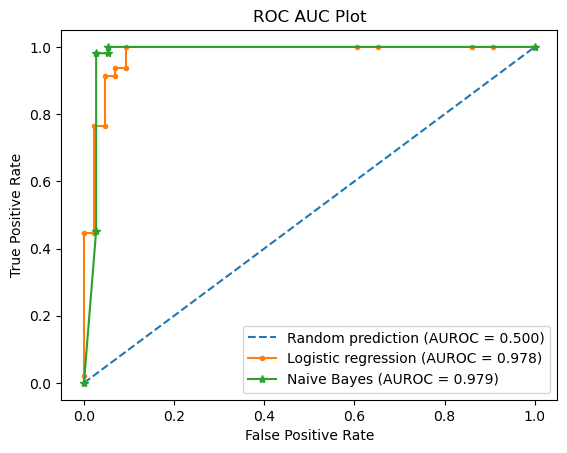

In [22]:
from sklearn.metrics import roc_auc_score,roc_curve
# Importing methods from metrics librariesGNB_prob = GNB.predict_proba(X_test)
LOR_pbs = LOR.predict_proba(X1_test)
GNB_pbs = GNB.predict_proba(X_test)
# we are creating predicting probability data matrix

r_pbs = [0 for _ in range(len(y_test))]
#This will serve as our base line,if a model falls below this, it means it is in dumb mode and its accuracy is 50%.

GNB_pbs = GNB_pbs[:,1]
LOR_pbs = LOR_pbs[:,1]
#we will jsut keep the possibility of the observation.

r_auc_roc = roc_auc_score(y_test, r_pbs)
GNB_AUC_roc = roc_auc_score(y_test,GNB_pbs)
LOR_AUC_roc = roc_auc_score(y1_test,LOR_pbs)
#Here we are talking about the area under the auc_roc curve. 

print('Random (chance) Prediction(our base line): AUROC = %.3f' % (r_auc_roc))
print(f"ROC AUC score for Naive Bayes {GNB_AUC_roc*100}")
print(f"ROC AUC score for Logistic regression {LOR_AUC_roc*100}")
#

r_fapr, r_tapr, _ = roc_curve(y_test, r_pbs)
LOR_fapr, LOR_tapr, _ = roc_curve(y1_test, LOR_pbs)
GNB_fapr, GNB_tapr, _ = roc_curve(y_test, GNB_pbs)
# Here we are calculating the true positive rate and the false positive rate, which is used for calculating the ROC curve.
plt.plot(r_fapr, r_tapr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc_roc)
plt.plot(LOR_fapr, LOR_tapr, marker='.', label='Logistic regression (AUROC = %0.3f)' % LOR_AUC_roc)
plt.plot(GNB_fapr, GNB_tapr, marker='*', label='Naive Bayes (AUROC = %0.3f)' % GNB_AUC_roc)
#ploting the graph 
# Title
plt.title('ROC AUC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#### 3.Cross validation


- there are various typr of Cross validation Techniques,
    1. Leave one out Cross Validation.
       - As the name implies, it works exactly the same way, one observation is taken from the entire data set and used as test data, while the rest are used to train the model.
       - Other data points are selected and left out in the next iteration, which is one of the biggest drawbacks for a dataset of only 1000 observations that requires 1000 iterations.
       - it also suffers from low bais issue
    2. K fold cross validation.
       - It is one of the most common and widely used validation techniques.
       - It works by randomly dividing the data into K samples, one of which is retained for testing and the remaining (K-1) is used as a training sample; this process is then repeated K times with a different $K_{th}$ sample as the testing data.
       - This gives us the mean accuracy of the model with the highest and lowest ranges; this validation technique is widely used in industry.  
       - Even this validation has some drawback,
            - In the case of binary classification, there is a chance that our test dataset contains only one category or is heavily dominated by one category,this will affect our accuracy.
    3. Stratified cross-validation 
       - To overcome the drawback of K-fold cross validation, every time the test data set is collected, it makes sure that it is balanced.
        - It is typically applied when the target categorical class is unbalanced and dominated by a single category.
        
- After cleaning the data our data set is somewhat balanced, so we have two options eith to go with  K fold cross validation or with Stratified cross-validation

     4. (and we have also seen HoldOut validation approach earlier )

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
straKfold = StratifiedKFold(n_splits=8)
score = cross_val_score(GNB,X_test,y_test.values.ravel(),cv=straKfold)
print(f"score from Stratified cross-validation on Naive Bayes {np.mean(score)}")
print(f" range of score from Stratified cross-validation on Naive Bayes: {list(score)}")

print("-------------------------------------------------------------------")

straKfold1 = StratifiedKFold(n_splits=8)
scores1 = cross_val_score(LOR,X1_test,y1_test.values.ravel(),cv=straKfold)
print(f"score from Stratified cross-validation on Logistic Regression {np.mean(scores1)}")
print(f" range of score from Stratified cross-validation onLogistic Regression: {list(scores1)}")

score from Stratified cross-validation on Naive Bayes 0.9554924242424242
 range of score from Stratified cross-validation on Naive Bayes: [0.9166666666666666, 1.0, 0.9090909090909091, 0.9090909090909091, 1.0, 1.0, 1.0, 0.9090909090909091]
-------------------------------------------------------------------
score from Stratified cross-validation on Logistic Regression 0.9214015151515151
 range of score from Stratified cross-validation onLogistic Regression: [1.0, 0.9166666666666666, 0.9090909090909091, 0.9090909090909091, 1.0, 1.0, 0.9090909090909091, 0.7272727272727273]


## Conclusion
  - Apart from these parameters, there are various other criteria that also play a major role in deciding which model is best.Like
  
  - speed, let's say our model is 98 percent accurate and has a very good F1 score too, but it takes 10 hours to run, then a model with slightly less accuracy but better speed will be considered.
  
  - Complexity, A good model that is very complex to understand will create a lot of issues while debugging and upgrading.
  
  - Compatibility: a good model should be compatible with the majority of devices.
   
   
   
 #### After considering all these parameters, scoring techniques, and validation techniques, I can say that the Naive Bayes classification works best on this dataset, but only by a margin. This can be due to the following reasons:
 #### 1. Naive Bayes Works best when the features in our dataset are independent,
 #### 2. Naive Bayes is slightly faster to train and predict as compared to that of Logistic regression
 #### On the other hand, Logistic regression can handle complex correlation between dataset
 
#### It is crucial to note that the performance of any machine learning model will depend on the specific problem being solved, and it is not always the case that one model will consistently outperform another. It is always a good idea to try out multiple models and compare their performance to ascertain which one is the best fit for a particular problem.
 
#### Additionally, it is worth considering the simplicity and computational efficiency of naive Bayes, as it is a relatively fast and simple model to train and use. This can be especially useful when working with large data sets or when real-time predictions are needed.